# Central and Peripheral Visual Field Contribuions to Scene Categorization

## Author: Adam M. Larson
## Data analysis in Python

citation:  Larson, A. M., & Loschky, L. C. (2009). The contributions of central versus peripheral vision to scene gist recognition. Journal of vision, 9(10), 6-6.  doi:https://doi.org/10.1167/9.10.6

This script will focus on:
1. Providing a summary of the research examining how central and peripheral vision contributes to the task of scene classification
2. Computing descriptive statistics from the data collected
3. Analyzing the data using logistic regression
4. Visualizing the data

## Introduction

Our view of the visual world is quite extensive.  It allows us a glimpse as to where we are, what objects and poeple are in front of us, how we may go about navigating the enivornment, and so on.  However, with such a large view of the world, only a very small percentage of it can extract out sharp details.  This area is called central vision and we place our gaze on things that require this sharp detailed vision, like object and face recognition.  Outside of central vision is peripheral vision.  It takes up most of our visual field.  Furthermore, it only detects blurry visual details and motion.  Would these visual features be enough for people to recognize the scene category of an image (e.g., "Forest" vs. "Mountain")?    

This study presented participants with images that presented information in central vision or peripheral vision. Like in the figure below, the Window condition presented visual information in central vision, whereas the scotoma condition blocked central visual information except for that in the periphery.

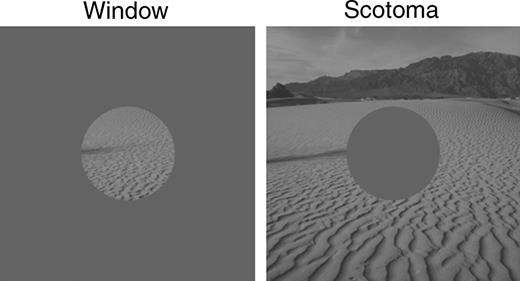

## Methods

Participants could view windows and scotomas of different sizes, like in the figure below.  The top row shows various windows sizes from a one degree window (which consists of foveal vision, the best region of our visual field for detecting details.  To understand its size, it is the width of your index finger at arms length).  Next, a five degree window encompases all of your central vision (e.g., the width of your fist at arms length).  At 10.8 degrees, the window takes up 50% of the image and at 13.6 there is more viewable area than is being blocked.  The bottom row shows the scotomas of the same size.  a one degree scotoma blocks all of foveal vision (where we are best at extracting details), the five degree scotoma blocks all of central vision leaving just peripheral vision.  At 10.8 degrees there is an equal amount of viewable area in the periphery as there is visual area being blocked centrally.  Finally at 13.6 degrees, more veiwable area is blocked in the image than is being viewed. 

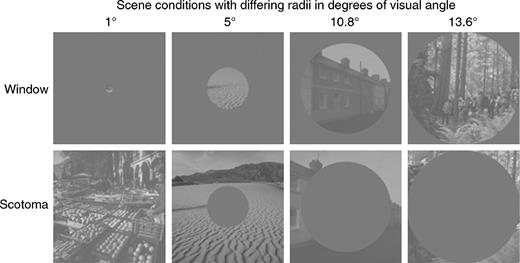

Participants viewed many trials in our experiment.  Below is an example of one of those trails.  First, participants fixated a cross in the center of the computer screen and when ready, pressed any button to start the trial.  An image would be presented (either window or scotoma) for 106 ms, followed by a gray screen for 750 ms (three quarters of a second), and then a post cue word.  When presented with the post cue, participants responded if the word matched the scene category.  Half the time the word did match the scene category.  

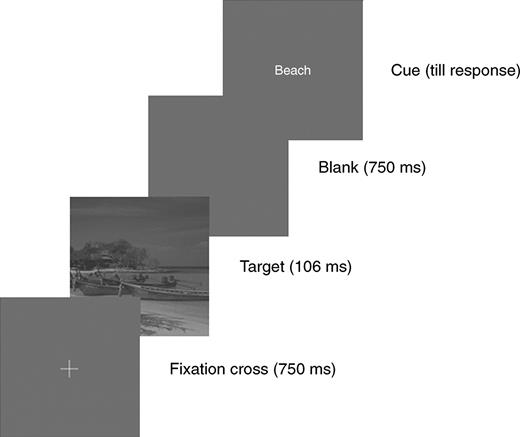

## Results

The results are shown in the line graph below.  The x-axis varies the size of the window/scotoma and the y-axis shows the proportion of correct responses.  The blue line shows the performance for the window condition, while the red line shows the scotoma performance.  Overall, removing the foveal visual field (one degree scotoma) and all of central vision (five degree scotoma) has no effect on scene categorization performance relative to a control condition where participants viewed the entire unaltered image.  Additionally, those scotoma conditions performance were much better than the window conditions.  However, the effect reverses with window sizes of 10.8 degrees or larger.  Specifically, at those radius sizes, the  window condition outperforms the scotoma condition.  

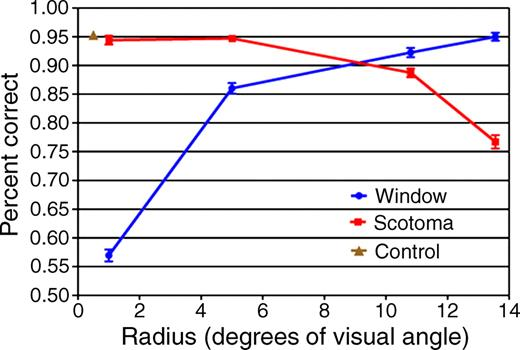

## Conclusion

This shows central vision is not necessary for the task of scene categorization.  Furthermore, the visual periphery can extract the necessary information needed to categorize the environment.  It is possible that after recognizing our current location, that we use that information to guide our attention to critical objects, people, and routes to interact with within that environment.

# Data Analysis in Python

First, import the necessary libraries and the data

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('ScoWin1_(1-98)(new_vars).csv')

In [4]:
print(f"The data contains {data.shape[1]} columns and {data.shape[0]} rows.")

The data contains 22 columns and 31358 rows.


The data was imported correctly.  I printed the column names to find the columns that I will be grouping my data on.
1. 'type' defines whether the image presented was a Window or Scotoma image (type: [1= window or 2= scotoma])
2. 'x_diam' defines the size of the Window/Scotoma radius in pixels (25, 124, 269, 337 px)
3. 'Condition' defines if the image was a window/scotoma or a control image (if Condition = 1 or 2, then they were control conditions where participants saw the unaltered image.  Conditions 3 and 4 presented the window and scotoma images.

The dependent variable will be:
1. correct (is the response correct [=1] or incorrect [=0])

Instead of running analyses based on the coding contained in the data, I will recode the 'condition' and 'type' into new variables using the string labels.   

In [6]:
data['recode_condition'] = data['condition'].apply(lambda x: 'Control' if (x == 1 or x == 2) else 'Experimental')
data['recode_view'] = data['type'].apply(lambda x: 'Window' if (x==1) else 'Scotoma')
data.head(n=-15)

,IMAGE_START,IMAGE_END,responseRT,responseKey,cat,cuecat,cue,target,valid,pos,...,trial,condition,Response,Subject,Image_dur,correct,Control_or_Experimental,Natural_or_Manmade,recode_condition,recode_view
0,63323.03,63429.02,562.66,1,7,9,Street,9207020.bmp,0,"""(337, 337)""",...,12,1,0,1,105.99,1,0,1,Control,Window
1,65866.57,65972.56,596.71,2,7,7,Pool,9207027.bmp,1,"""(337, 337)""",...,13,1,1,1,105.99,1,0,1,Control,Window
2,83059.02,83165.01,409.37,2,9,9,Street,9209023.bmp,1,"""(337, 337)""",...,18,1,1,1,105.99,1,0,1,Control,Window
3,85767.44,85873.42,1303.51,1,2,4,Home,9202021.bmp,0,"""(337, 337)""",...,19,1,0,1,105.98,1,0,1,Control,Window
4,98131.88,98237.86,634.99,2,2,2,Farm,9202001.bmp,1,"""(337, 337)""",...,23,1,1,1,105.98,1,0,1,Control,Window
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31338,642287.52,642393.49,867.99,2,3,1,Desert,6303003.bmp,0,"""(337, 337)""",...,182,4,1,99,105.97,0,1,0,Experimental,Scotoma
31339,654769.71,654875.70,796.72,2,0,0,Beach,6300020.bmp,1,"""(337, 337)""",...,186,4,1,99,105.99,1,1,0,Experimental,Scotoma
31340,657478.13,657584.10,710.86,1,3,1,Desert,6303003.bmp,0,"""(337, 337)""",...,187,4,0,99,105.97,1,1,0,Experimental,Scotoma
31341,673975.81,674081.80,634.39,1,0,8,River,6300028.bmp,0,"""(337, 337)""",...,192,4,0,99,105.99,1,1,0,Experimental,Scotoma


I will specify the data type for my two new recoded variables (['recode_condition', 'recode_view']).  Then, I will ensure the remaining columns are the correct data type


In [7]:
data['recode_condition'] = data['recode_condition'].astype("category")
data['recode_view'] = data['recode_view'].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31358 entries, 0 to 31357
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   IMAGE_START              31358 non-null  float64 
 1   IMAGE_END                31358 non-null  float64 
 2   responseRT               31358 non-null  float64 
 3   responseKey              31358 non-null  int64   
 4   cat                      31358 non-null  int64   
 5   cuecat                   31358 non-null  int64   
 6   cue                      31358 non-null  object  
 7   target                   31358 non-null  object  
 8   valid                    31358 non-null  int64   
 9   pos                      31358 non-null  object  
 10  x_diam                   31358 non-null  int64   
 11  y_diam                   31358 non-null  int64   
 12  type                     31358 non-null  int64   
 13  subj                     31358 non-null  int64   
 14  trial 

In [8]:
desc = data.groupby(["recode_condition", "recode_view", "x_diam"], as_index=False).agg({'correct': ['mean', 'std']})
desc.columns = ['Condition', 'View', 'size', 'mean correct', 'mean std']
desc

C:\Users\admla\AppData\Local\Temp\ipykernel_25128\3724246589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc = data.groupby(["recode_condition", "recode_view", "x_diam"], as_index=False).agg({'correct': ['mean', 'std']})


,Condition,View,size,mean correct,mean std
0,Control,Scotoma,25,0.954255,0.208986
1,Control,Scotoma,124,0.950000,0.218003
2,Control,Scotoma,269,0.952660,0.212422
3,Control,Scotoma,337,0.957979,0.200691
4,Control,Window,25,0.948404,0.221268
5,Control,Window,124,0.947872,0.222344
6,Control,Window,269,0.954787,0.207826
7,Control,Window,337,0.958511,0.199472
8,Experimental,Scotoma,25,0.944090,0.229804
9,Experimental,Scotoma,124,0.947059,0.223971


Now I have the descriptive statistics, I will visualize the data.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

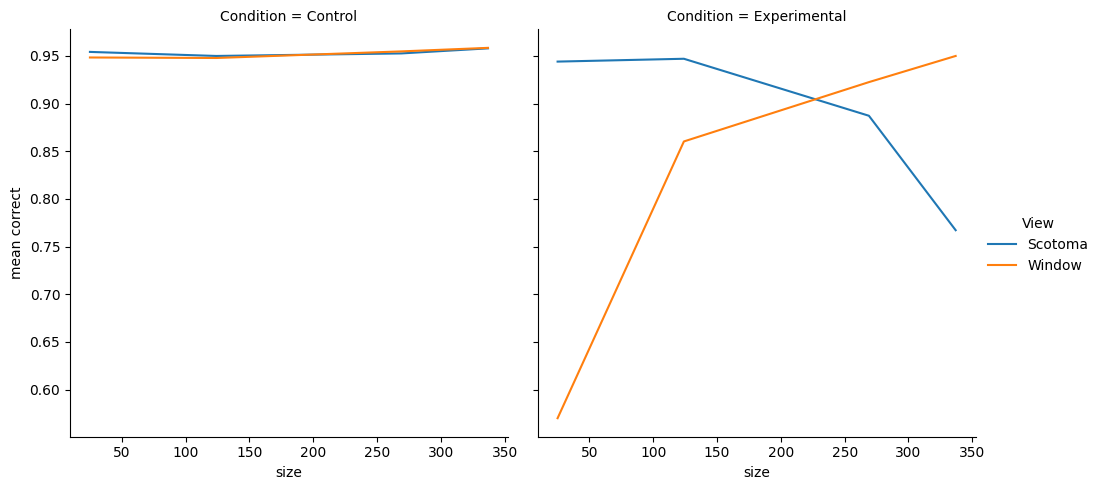

In [10]:
sns.relplot(data=desc,
            x = "size",
            y = "mean correct",
            col = "Condition",
            hue = "View",
            kind = "line"
           )

This will attempt to use seaborn line plot to plot the data by passing it the long-form data.

In [11]:
data['recode_condition'] = data['condition'].apply(lambda x: 'Control' if (x == 1 or x == 2) else 'Experimental')

The two cells below are used as a sanity check to know if I applied the lambda function correctly.

The plot is given the long form data to generate the line plot.

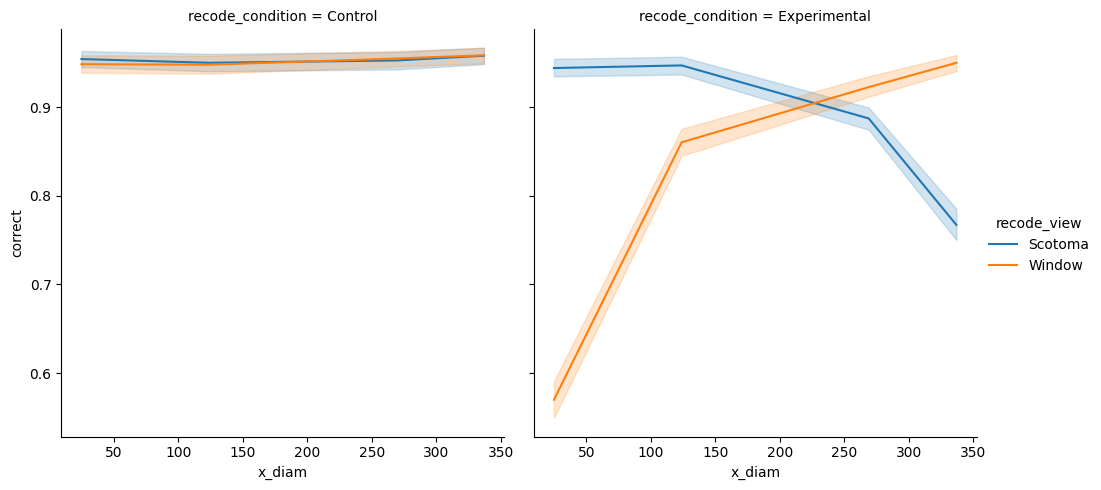

In [12]:
sns.relplot(data = data,
             x = "x_diam",
             y = "correct",
             col = "recode_condition",
             hue = "recode_view",
             kind = "line"
             )

# Data Analysis

I'll focus on analyzing the Experimental trials using a logistic regression.

In [83]:
exp_data = data.query("recode_condition == 'Experimental'") # Selects only the experimental trials
print(f"the data contains {exp_data.shape[0]} rows and {exp_data.shape[1]} columns.")

the data contains 16318 rows and 24 columns.


In [84]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Data Pre-Processing for a logistic regression

The 'x_diam' variable measures the radius of the window or scotoma in terms of pixels.  If I analyze the data using a logistic regression with the data as is, then the y-intercept would represent the accuracy of scene categorizition with a radius of zero.  This would represent a nonsensicle interpretation, especially for the window condition since it would say that participants would achieve some level of accuracy even though the entire image was removed from view.  

So to make this variable and the y-intercept meaningful, I will shift the intercept so that it corresponds with the smallest window and scotoma radius. 

In [85]:
# Origianl mean of the "x_diam" variable

exp_data.loc[:,"x_diam"].mean()

188.77006986150263

In [86]:
exp_data["c_x_diam"] = exp_data.loc[:, "x_diam"].subtract(25) # New variable is centered on the 25 pixel radius.
exp_data["c_x_diam"].mean()

C:\Users\admla\AppData\Local\Temp\ipykernel_25128\3410248018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_data["c_x_diam"] = exp_data.loc[:, "x_diam"].subtract(25) # New variable is centered on the 25 pixel radius.


163.77006986150263

The 'type' variable specifies if the image was a window or scotoma image.  I will use Treatment coding for this categorical variable, and set the window as the reference level.

In [87]:
from patsy.contrasts import Treatment
levels = [1,2]
contrast = Treatment(reference = 0).code_without_intercept(levels)
print(contrast.matrix)

[[0.]
 [1.]]


In [88]:
formula = "correct ~ C(type, Treatment) * c_x_diam"
mdl2 = smf.glm(formula=formula, data=exp_data, family=sm.families.Binomial())
results = mdl2.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                correct   No. Observations:                16318
Model:                            GLM   Df Residuals:                    16314
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5937.1
Date:                Mon, 17 Jun 2024   Deviance:                       11874.
Time:                        15:04:56   Pearson chi2:                 1.72e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09197
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## Logistic Regression Results

For ease of interpretation, I will discuss the results in terms of the predicted probabilities, instead of the logit coefficients.  The smallest window was significintly different from zero, with a predicted probability of 61 percent (logit = 0.46, z = 11.26, p < .001).  Performance for the scotoma condition was significantly greater than the window condition, with a predicted probability of 96 percent accuracy, (logit = 2.74, z = 29.08, p < .001).  Performance increased as the radius size increased for the window condition, (logit = 0.0089, z = 29.02, p < .001).  However, for the scotoma condition, performance decreased with increasing radius, (logit = -0.015, z = -32.15, p < .001).  

In [1]:
def invlogit(x):
    prt = (1/(1+np.exp(-x)))
    return prt

In [75]:
pct = invlogit(0.4607+2.7484+(0.0089)+(-0.0148))-invlogit(0.4607+2.7484)
print(pct)

-0.00022077242196782976


In [62]:
results.fittedvalues.unique()

array([0.61318024, 0.79341402, 0.9334998 , 0.96265749, 0.96117601,
       0.93248549, 0.85454863, 0.79735907])

In [60]:
prd = results.params[0] + (1*results.params[1]) + (269*results.params[2]) + (269*results.params[3])
print(prd)

2.641735822964516


I need to create my matrix with each combintation of IV

In [90]:
y, X = dmatrices('correct ~ type * c_x_diam', data=exp_data, return_type='dataframe')

In [95]:
y.head(); y.shape

(16318, 1)

In [96]:
X.head(); X.shape

(16318, 4)

In [97]:
predicted_data = pd.concat([X, y], axis=1)

In [99]:
predicted_data.head(-5)

,Intercept,type,c_x_diam,type:c_x_diam,correct
15040,1.0,1.0,0.0,0.0,0.0
15041,1.0,1.0,0.0,0.0,0.0
15042,1.0,1.0,0.0,0.0,0.0
15043,1.0,1.0,0.0,0.0,1.0
15044,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
31348,1.0,2.0,312.0,624.0,1.0
31349,1.0,2.0,312.0,624.0,0.0
31350,1.0,2.0,312.0,624.0,0.0
31351,1.0,2.0,312.0,624.0,1.0


<Axes: title={'center': 'Predicted Accuracy for Window and Scotoma Images of various sizes'}, xlabel='c_x_diam', ylabel='correct'>

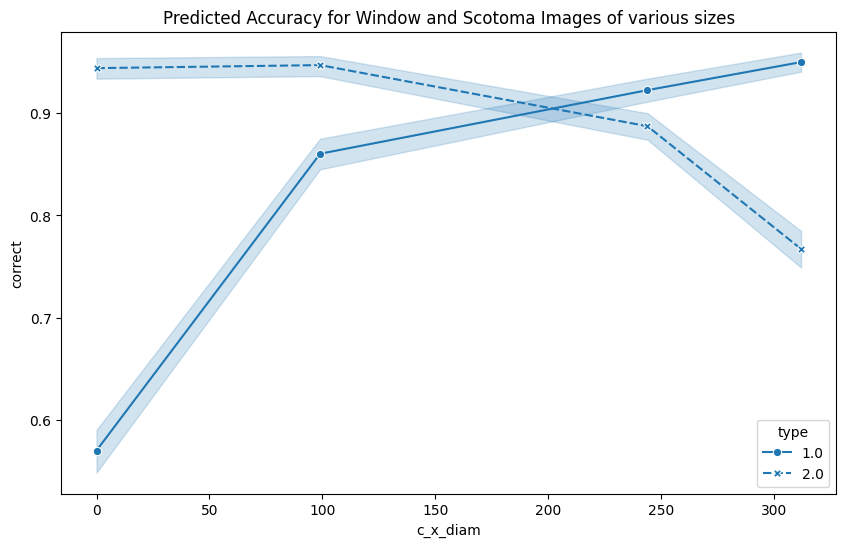

In [101]:
plt.figure(figsize=(10,6))

plt.title("Predicted Accuracy for Window and Scotoma Images of various sizes")

sns.lineplot(data = predicted_data,
             x = "c_x_diam",
             y = "correct",
             style = "type",
             markers = True,
             errorbar=('ci', 95)
             )